# Linear Modeling

## Objectives

+ Describe what unsupervised machine learning is

+ Describe what supervised machine learning is

+ Contrast the difference between **quantitative** and **qualititave** varaibles

+ Describe what classification is

+ Describe what regression is

# Unsupervised Learning

+ Obtain some input data

+ Only the input data is known. There is no known good output data for training.

+ Throw algorithms at your data to find structure.

We do not focus on unsupervised learning tonight.

# Supervised Learning

+ Take **known** input data

+ Create a model of that data and **train** it based on **known** output data

+ After that, predict outputs from previously unknown inputs.

# Quantitative vs Qualititave variables

+ Quantitative variables are continuous variable values

+ Qualititave variables seperate things into a controlled number of categories or *classes*

+ Regression is used to predict *quantitative* variables. 

+ Classification is used to predict *qualitative* variables.


In [1]:
# The essentials
import pandas as pd
import numpy as np

# Datasets to experiment with
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris

# Magic!
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# For data vis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Logisitc regression, classification, and irises

+ Load the famous iris dataset and do exploratory data analysis and data vis

+ train a logitic regression model.

+ Use this logistic regression model to predict the class of irises based on their attributes.

+ Split the input data into training data (used to create the model) and test data (used to asses accuracy of the model)

+ `score()` the model on test data to asses the **accuracy** of its predictions.

## Load the irises, put them into a `DataFrame`

Iris data is built in!

In [2]:
iris_data = load_iris()
print iris_data.DESCR
# https://en.wikipedia.org/wiki/Iris_flower_data_set

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [3]:
iris_data.target_names[iris_data.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [4]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
print iris_data.data

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [6]:
target_names = iris_data.target_names[iris_data.target]
column_names = [name[:-5].replace(' ', '_') for name in iris_data.feature_names]
iris_df = pd.DataFrame(iris_data.data, columns=column_names)
iris_df['target'] = iris_data.target
iris_df['label'] = target_names
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
target          150 non-null int64
label           150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [8]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## Exploratory data vis

Do you see the red dots on the left. Setosa is where it's at!

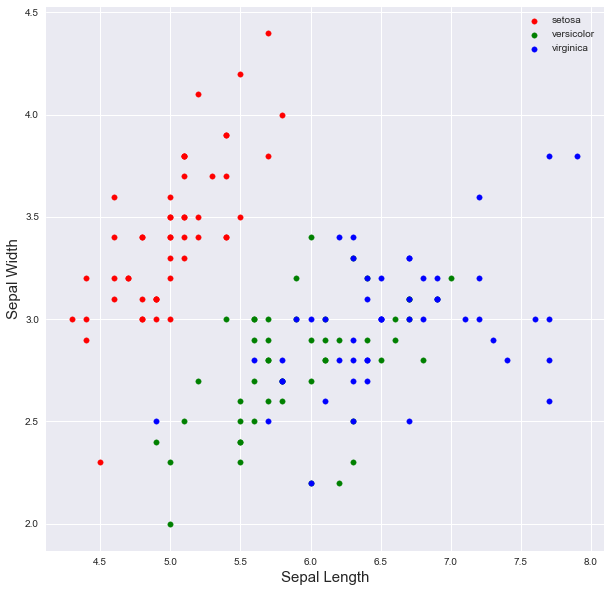

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
for target, color in zip(iris_df.target.unique(), ['r', 'g', 'b']):
    sub_df = iris_df.query('target == @target')
    ax.scatter(x=sub_df.sepal_length.values, y=sub_df.sepal_width.values, 
               color=color, label=iris_data.target_names[target], s=30)
ax.legend(loc='best')
ax.set_xlabel('Sepal Length', size=15)
ax.set_ylabel('Sepal Width', size=15)

# Logistic Regression: X, y, and fit.

Capital **`X`** means a the matrix with observations from actual data down the rows and observed attributes across the columns. These are the attributes that will used to predict  **`y`** is the column vector of categorical values that we will want to predict later in our model later.

Note that essentially we are taking our matrix of observations, carving a column out of it that that we will use to train, then later predict, our data.

# Train and Test Logistic Regression

+ Fit the logisitc model

+ Test the model on a single observation where it should predict Setosa as our iris type.

+ Run the model on all known observations and score its accuracy.

In [10]:
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = iris_df['label'].values
logistic_model = LogisticRegression()
logistic_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
print 'Model guess for single point: {}'.format(logistic_model.predict(np.array([[4.5, 3.3, 1.6, 0.2]]))[0])
logistic_model.predict(np.array([[7.2, 2.8, 6.6, 2], [6.2, 2.5, 3.6, 2], [4.7, 3.6, 1.9, .1]]))

Model guess for single point: setosa


array(['virginica', 'versicolor', 'setosa'], dtype=object)

In [12]:
logistic_model.predict(X) # Notice I did not pass in y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'vers

In [13]:
logistic_model.score(X, y)    # y is necessary to score the model

0.95999999999999996

### Wow that is a great score!

But we just tested our model on the data we trained it with. So it had better be good. Better to score it data it hasn't seen before.

# Splitting test and train data

+ Split the data into training and testing data

+ Train the model on the training data

+ Test model on test data by testing it on data it has not seen before. That is calld out-of-sample data.

+ Run the score multiple times.

+ Watch the scores change as different splits are made in the dataset.

In [14]:
logistic_model = LogisticRegression()
trials = 10

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    logistic_model.fit(X_train, y_train)
    print 'Score {} of {} is {}'.format(i+1, trials, logistic_model.score(X_test, y_test))

Score 1 of 10 is 0.973684210526
Score 2 of 10 is 0.947368421053
Score 3 of 10 is 0.973684210526
Score 4 of 10 is 0.947368421053
Score 5 of 10 is 0.947368421053
Score 6 of 10 is 0.921052631579
Score 7 of 10 is 1.0
Score 8 of 10 is 0.973684210526
Score 9 of 10 is 1.0
Score 10 of 10 is 0.894736842105


# Regression time!

+ Load the Boston housing data set into a DataFrame

+ Make the column names reasonable

+ So some very light EDA and data vis on the dataset

+ Train and score the linear model, both on the training data and on test data.

+ We are interested in median value **`medv`**

In [15]:
boston_data = load_boston()
print boston_data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [16]:
column_names = [name.lower() for name in boston_data.feature_names]
boston_df = pd.DataFrame(boston_data.data, columns=column_names)
boston_df['medv'] = boston_data.target
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null float64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null float64
tax        506 non-null float64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


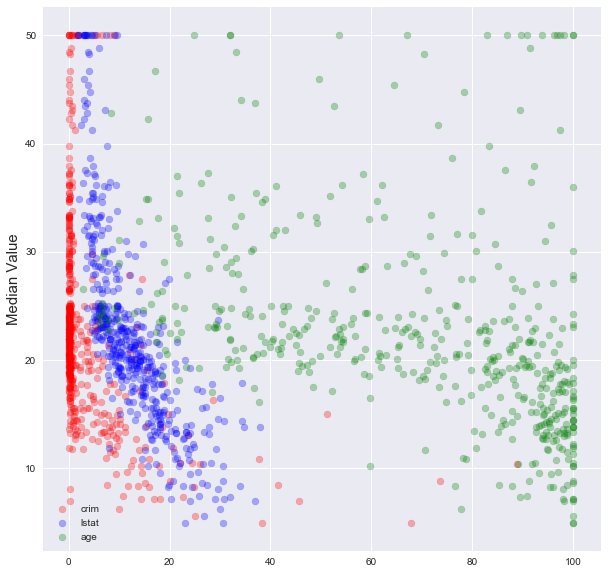

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
for feature, color in zip(['crim', 'lstat', 'age'], ['r', 'b', 'g']):
    ax.scatter(x=boston_df[feature].values, y=boston_df.medv.values, 
               color=color, alpha=0.3, label=feature)
ax.set_ylabel('Median Value', size=15)
ax.legend(loc='best')

Different color for different attributes. We plotted all the attributes on the same Y axis so there aren't meaningful units. But we can do better, can't we?

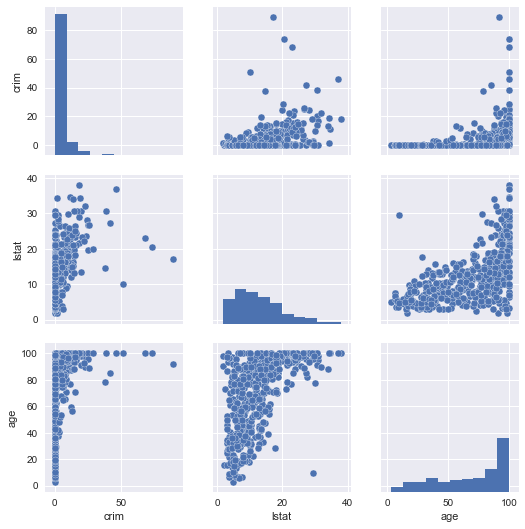

In [19]:
sns.pairplot(data=boston_df[['crim', 'lstat', 'age']])

Let's find some median values...

In [20]:
X = boston_df.drop('medv', axis=1).values       # Take the medv out of the X values
y = boston_df['medv'].values                    # But will be our y values
linear_model = LinearRegression()

trials = 10

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    linear_model.fit(X_train, y_train)
    print 'Score {} of {} is {}'.format(i+1, trials, linear_model.score(X_test, y_test))
    
linear_model.coef_

Score 1 of 10 is 0.689739783396
Score 2 of 10 is 0.726897430702
Score 3 of 10 is 0.749644424052
Score 4 of 10 is 0.745551801632
Score 5 of 10 is 0.774809980906
Score 6 of 10 is 0.738125135806
Score 7 of 10 is 0.649506219212
Score 8 of 10 is 0.784504504489
Score 9 of 10 is 0.752231313352
Score 10 of 10 is 0.70067978326


array([ -8.86458814e-02,   4.23500132e-02,   3.19252936e-02,
         2.45823652e+00,  -1.77953393e+01,   4.12861108e+00,
         7.88622695e-03,  -1.33754521e+00,   2.74522527e-01,
        -8.51176105e-03,  -1.00769746e+00,   1.01183069e-02,
        -5.43899400e-01])

# Question for the audience

...can you see the polymorphism?